In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from tqdm.notebook import tqdm

In [4]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, InkLibrary
from chromalab.spectra import Spectra, Illuminant

In [5]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
wavelengths4 = np.arange(380, 781, 4)

In [7]:
%load_ext autoreload
%autoreload 2

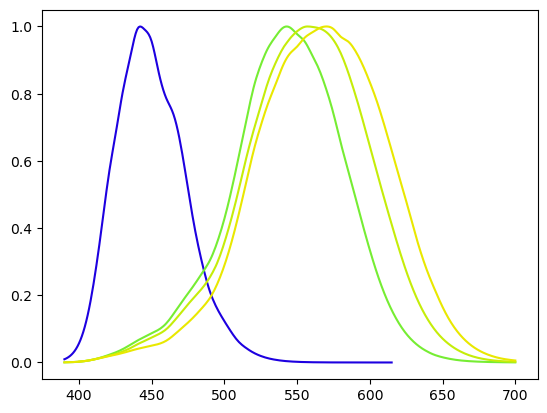

In [111]:
Cone.s_cone().plot()
Cone.m_cone().plot()
Cone.q_cone().plot()
Cone.l_cone().plot()

In [8]:
cellneug = {}
with open(f'../data/nix/28cellNB.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        cellneug[name] = spectra

/Users/varun/Documents/Python/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [9]:
cellneug

{'00000': <chromalab.spectra.Spectra at 0x2a2211fd0>,
 '00001': <chromalab.spectra.Spectra at 0x2a199cc90>,
 '00002': <chromalab.spectra.Spectra at 0x10f4c5290>,
 '00010': <chromalab.spectra.Spectra at 0x2a2237d90>,
 '00011': <chromalab.spectra.Spectra at 0x2a062fbd0>,
 '00012': <chromalab.spectra.Spectra at 0x2a2237390>,
 '00020': <chromalab.spectra.Spectra at 0x2a19a4f10>,
 '00021': <chromalab.spectra.Spectra at 0x2a2236950>,
 '00022': <chromalab.spectra.Spectra at 0x2a2062350>,
 '00100': <chromalab.spectra.Spectra at 0x2a22372d0>,
 '00101': <chromalab.spectra.Spectra at 0x2a2226350>,
 '00102': <chromalab.spectra.Spectra at 0x10afd3490>,
 '00110': <chromalab.spectra.Spectra at 0x2a2227b50>,
 '00111': <chromalab.spectra.Spectra at 0x2a062f790>,
 '00112': <chromalab.spectra.Spectra at 0x2a19a28d0>,
 '00120': <chromalab.spectra.Spectra at 0x2a2236c10>,
 '00121': <chromalab.spectra.Spectra at 0x2a19a0a50>,
 '00122': <chromalab.spectra.Spectra at 0x2a22376d0>,
 '00200': <chromalab.spectra

In [10]:
d65 = Illuminant.get("d65")

In [11]:
gamut = InkGamut(CellNeugebauer(cellneug), illuminant=d65)

In [26]:
gamut_nielsen = InkGamut(CellNeugebauer(cellneug, n=1.8), illuminant=d65)

In [11]:
spectras, percentages = gamut.get_spectral_point_cloud()

Generating point cloud: 1it [00:00, 51.10it/s]
Generating point cloud: 1it [00:00, 60.86it/s]
Generating point cloud: 1it [00:00, 58.09it/s]
Generating point cloud: 1it [00:00, 58.59it/s]
Generating point cloud: 1it [00:00, 61.89it/s]
Generating point cloud: 1it [00:00, 60.93it/s]
Generating point cloud: 1it [00:00, 61.80it/s]
Generating point cloud: 1it [00:00, 61.07it/s]
Generating point cloud: 1it [00:00, 61.87it/s]
Generating point cloud: 1it [00:00, 60.72it/s]
Generating point cloud: 1it [00:00, 61.85it/s]
Generating point cloud: 1it [00:00, 60.77it/s]
Generating point cloud: 1it [00:00, 61.40it/s]
Generating point cloud: 1it [00:00, 60.54it/s]
Generating point cloud: 1it [00:00, 61.79it/s]
Generating point cloud: 1it [00:00, 61.30it/s]
Generating point cloud: 1it [00:00, 61.37it/s]
Generating point cloud: 1it [00:00, 62.33it/s]
Generating point cloud: 1it [00:00, 61.69it/s]
Generating point cloud: 1it [00:00, 61.08it/s]
Generating point cloud: 1it [00:00, 61.57it/s]
Generating po

In [53]:
tetrachromat = Observer.tetrachromat(illuminant=d65)

In [54]:
buckets = gamut.get_buckets(tetrachromat, stepsize=0.05)

Generating point cloud: 2it [00:00,  3.95it/s]                                                  
Generating point cloud: 2it [00:00,  4.87it/s]                                                  
Generating point cloud: 2it [00:00,  4.92it/s]                                                  
Generating point cloud: 2it [00:00,  5.17it/s]                                                  
Generating point cloud: 2it [00:00,  5.11it/s]                                                  
Generating point cloud: 2it [00:00,  4.91it/s]                                                  
Generating point cloud: 2it [00:00,  4.99it/s]                                                  
Generating point cloud: 2it [00:00,  4.87it/s]                                                  
Generating point cloud: 2it [00:00,  4.93it/s]                                                  
Generating point cloud: 2it [00:00,  4.96it/s]                                                  
Generating point cloud: 2it [0

Point cloud generated.


In [55]:
for d, (p1, p2) in buckets[:10]:
    print(d,list(np.round(np.array(p1) * 100)), list(np.round(np.array(p2) * 100)))

2.0 [50.0, 65.0, 0.0, 85.0, 0.0] [100.0, 0.0, 25.0, 35.0, 70.0]
2.0 [30.0, 65.0, 0.0, 90.0, 15.0] [95.0, 0.0, 15.0, 55.0, 90.0]
2.0 [10.0, 65.0, 5.0, 100.0, 0.0] [90.0, 0.0, 5.0, 65.0, 100.0]
1.5 [75.0, 45.0, 5.0, 70.0, 0.0] [100.0, 5.0, 30.0, 25.0, 20.0]
1.5 [75.0, 45.0, 5.0, 65.0, 15.0] [100.0, 0.0, 50.0, 10.0, 0.0]
1.5 [70.0, 60.0, 0.0, 65.0, 10.0] [100.0, 15.0, 40.0, 0.0, 10.0]
1.5 [70.0, 55.0, 5.0, 85.0, 10.0] [100.0, 10.0, 35.0, 60.0, 35.0]
1.5 [70.0, 55.0, 0.0, 90.0, 25.0] [100.0, 10.0, 40.0, 70.0, 10.0]
1.5 [70.0, 50.0, 10.0, 75.0, 10.0] [100.0, 0.0, 30.0, 30.0, 65.0]
1.5 [70.0, 50.0, 5.0, 75.0, 5.0] [100.0, 0.0, 35.0, 30.0, 50.0]


In [106]:
xs = []
ys = []
rgbs=[]

In [110]:
for i, (d, (p1, p2)) in enumerate(buckets[:1000] ):
    s = gamut.get_spectra(p1)
    xyz = s.to_xyz()
    rgb = s.to_rgb()
    xs.append(xyz[0]/ np.sum(xyz))
    ys.append(xyz[1] / np.sum(xyz))
    rgbs.append(rgb)
    r,g,b = rgb / np.max(rgb)
#     if y > 0.4 and x > 0.35:
#         print("green", i)
#     if y < 0.3 and y > 0.25 and x<0.25:
#         print("blue", i)
#     if x > 0.45 and x < 0.46 and y > 0.35 and y < 0.36:
#         print("pink", i)
    
    
    
#     print(d,list(np.round(np.array(p1) * 100)), list(np.round(np.array(p2) * 100)))

In [111]:
red

[]

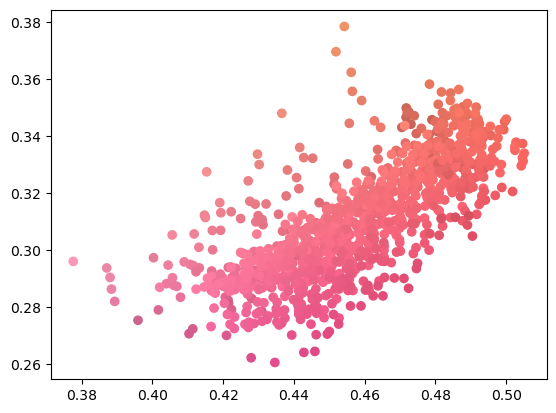

In [112]:
plt.scatter(xs, ys, c=rgbs)

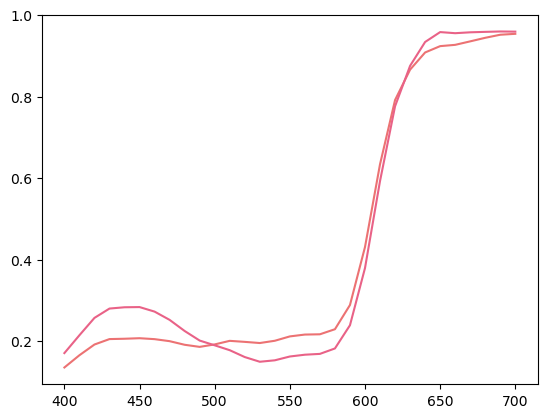

In [85]:
gamut.get_spectra(np.array([43.0, 57.0, 2.0, 95.0, 0.0]) / 100).plot()
gamut.get_spectra(np.array([52.0, 65.0, 0.0, 78.0, 0.0]) / 100).plot()

## 

In [ ]:
len(percentages)

In [ ]:
percentages[400]

In [ ]:
cellneug["00110"].plot()

In [ ]:
len(cellneug)

In [ ]:
3 ** 5

In [117]:
examine = [
    ((0.0, 0.65000000000000002, 0.0, 0.69999999999999996, 0.050000000000000003), 
     (0.80000000000000004, 0.0, 0.0, 0.050000000000000003, 0.90000000000000002)), 
    ((0.0, 0.69999999999999996, 0.0, 0.94999999999999996, 0.0), 
    (1.0, 0.0, 0.050000000000000003, 0.55000000000000004, 0.90000000000000002)), 
    ((0.0, 0.65000000000000002, 0.0, 0.94999999999999996, 0.0),
     (0.90000000000000002, 0.0, 0.050000000000000003, 0.59999999999999998, 0.85000000000000009)),
    ((0.0, 0.59999999999999998, 0.0, 0.80000000000000004, 0.0), 
     (0.75, 0.0, 0.0, 0.40000000000000002, 0.85000000000000009)), 
    ((0.050000000000000003, 0.55000000000000004, 0.0, 0.85000000000000009, 0.0), 
     (0.69999999999999996, 0.0, 0.0, 0.55000000000000004, 0.80000000000000004)),
    ((0.0, 0.69999999999999996, 0.0, 0.75, 0.0),
     (0.90000000000000002, 0.0, 0.5, 0.20000000000000001, 0.30000000000000004)), 
    ((0.0, 0.65000000000000002, 0.0, 0.85000000000000009, 0.0),
     (0.85000000000000009, 0.0, 0.40000000000000002, 0.55000000000000004, 0.45000000000000001)), 
    ((0.0, 0.59999999999999998, 0.0, 0.80000000000000004, 0.10000000000000001),
     (0.75, 0.0, 0.0, 0.45000000000000001, 0.90000000000000002)),
    ((0.0, 0.55000000000000004, 0.0, 0.75, 0.0), 
     (0.65000000000000002, 0.0, 0.10000000000000001, 0.45000000000000001, 0.69999999999999996)),
    ((0.10000000000000001, 0.69999999999999996, 0.0, 0.75, 0.050000000000000003),
     (0.94999999999999996, 0.0, 0.25, 0.050000000000000003, 0.69999999999999996))]

In [118]:
examine[0]

((0.0, 0.65, 0.0, 0.7, 0.05), (0.8, 0.0, 0.0, 0.05, 0.9))

In [123]:
s1 = gamut.get_spectra(examine[1][0])
s2 = gamut.get_spectra(examine[1][1])

In [124]:
print(tetrachromat.observe(s1))
print(tetrachromat.observe(s2))

[ 0.19150503  0.21689621  0.25486961  0.29801397]
[ 0.19522771  0.21333282  0.26909245  0.30374902]


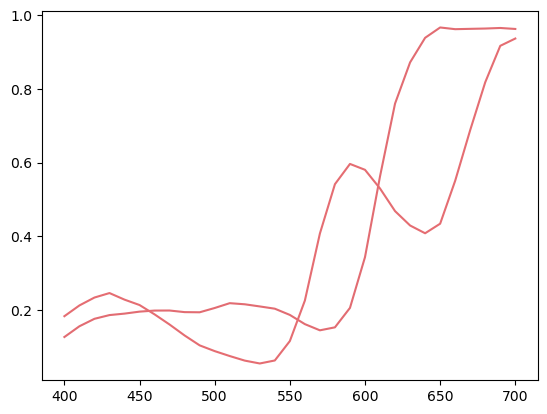

In [125]:
s1.plot()
s2.plot()

In [27]:
mets = {}
with open(f'../data/nix/29ishi.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        mets[name] = spectra

In [28]:
mets

{'05,70,0,75,0': <chromalab.spectra.Spectra at 0x2a2225b90>,
 '90,0,0,5,95': <chromalab.spectra.Spectra at 0x2a2226110>,
 '0,65,0,70,5': <chromalab.spectra.Spectra at 0x2a2227390>,
 '80,0,05,90': <chromalab.spectra.Spectra at 0x2a2213610>}

In [104]:
gamut_nielsen = InkGamut(CellNeugebauer(cellneug, n=50), illuminant=d65)

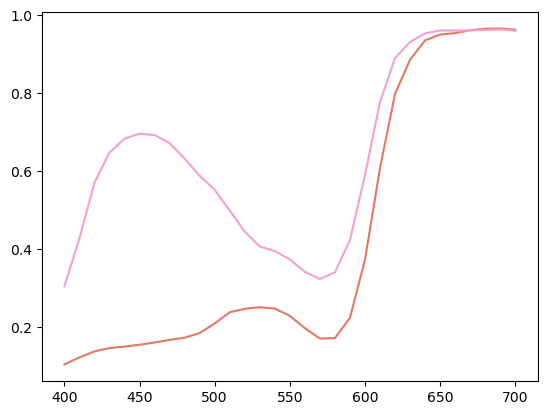

In [115]:
mets["0,65,0,70,5"].plot()
cellneug["01010"].plot()

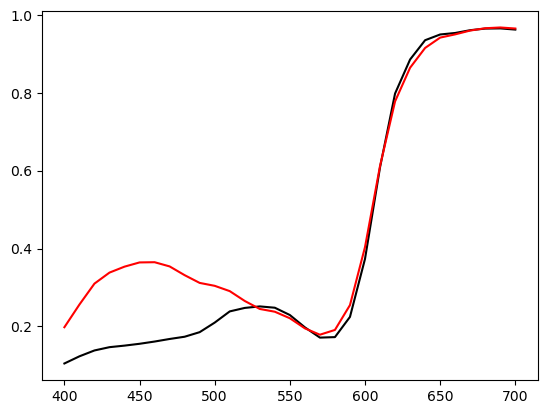

In [105]:
mets["0,65,0,70,5"].plot(color='black')
# gamut.get_spectra((0, 0.65, 0, 0.7, 0.05)).plot()
gamut_nielsen.get_spectra((0, 0.65, 0, 0.7, 0.05)).plot(color='red')

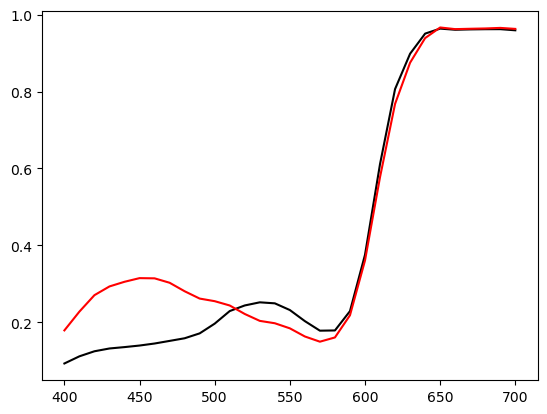

In [106]:
mets["05,70,0,75,0"].plot(color='black')
# gamut.get_spectra((0.05, 0.7, 0, 0.75, 0)).plot()
gamut_nielsen.get_spectra((0.05, 0.7, 0, 0.75, 0)).plot(color='red')

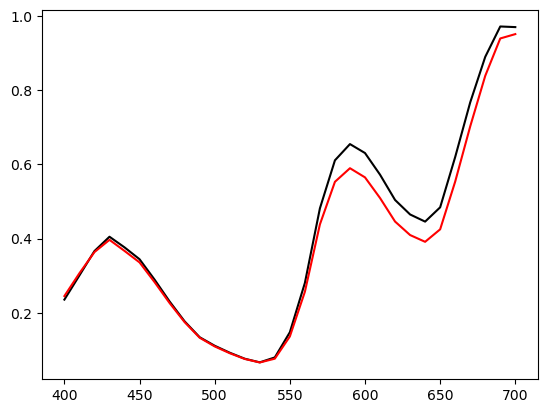

In [108]:
mets["90,0,0,5,95"].plot(color='black')
# gamut.get_spectra((0.9, 0,0,0.05,0.95)).plot()
gamut_nielsen.get_spectra((0.9, 0,0,0.05,0.95)).plot(color='red')

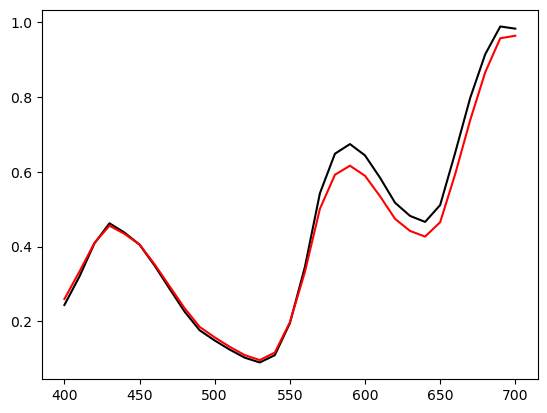

In [49]:
mets["80,0,05,90"].plot(color='black')
gamut_nielsen.get_spectra((0.8, 0,0,0.05,0.9)).plot(color='red')